# Music Genre Classification


<img src="../images/cover.png" alt="Girl in a jacket" width="700" height=auto>

# 1. Introduction


## 1.1.  Problem Understanding 

> 
##### Solution : Apply deep learning model to classify music genre.


## 1.2. Data 

> 

**Downloaded from :** https://www.kaggle.com/mathchi/diabetes-data-set



## 1.3. Evaluation Metrics :
> We will evaluate the performance of the model using : Accuracy, Precision  and Recall.

> + **Accuracy**
    > The percent (ratio) of cases classified correctly

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Accuracy ≤ 1 (good) </p> 

> + **Precision** => Accuracy of a predicted positive outcome 

$$Precision = \frac{TP}{TP + FP}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Precision ≤ 1 (good) </p> 

> + **Recall** => Measures model’s ability to predict a positive outcome 

$$Recall = \frac{TP}{TP + FN}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Recall ≤ 1 (good) </p> 

> + **F1 Score** => A combined metric, the harmonic mean of Precision and Recall. 

$$F1 Score = \frac{2*(Precision * Recall)}{Precision + Recall}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ F1 Score ≤ 1 (good) </p>

+ Low when one or both of the Precision and Recall are low
+ High when both Precision and Recall are high



Read More : https://care.diabetesjournals.org/content/29/8/1866

## 1.4. Importing Packages

In [46]:
from helpers import *
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import os
import json


print("Libraries Imported ..")

Libraries Imported ..


## 1.5. Loading the data

In [55]:
DATASET_PATH = "../data/urban_sound"
train = pd.read_csv("../data/UrbanSound8K.csv")
i = random.choice(train.index)
file = train.loc[i]['slice_file_name']
file = DATASET_PATH + '/fold1/' + file

print('File: ', file)

print('Class: ', train['class'][i])


signal, sample_rate = librosa.load(file, sr=22050)
tempo, beat_frames = librosa.beat.beat_track(signal, sample_rate)
print("Dataset Loaded ... ")

File:  ../data/urban_sound/fold1/135526-6-11-0.wav
Class:  gun_shot


FileNotFoundError: [Errno 2] No such file or directory: '../data/urban_sound/fold1/135526-6-11-0.wav'

In [ ]:
list(filter(os.DATASET_PATH.isfile, os.listdir(<path>)))

# 2. Exploratory Data Analysis (EDA)

## 2.1. Undertanding the Data

> Tempo: is the pace at which your patterns replicate. You measure tempo in beats per minute (BPM). So if we talk about a piece of music being at 120 BPM, we say that every minute there are 120 beats (pulses).

> Beat: a period of time. It is basically the rhythm that you will clap to in a song. You get four beats in your bar in 4/4 time, for instance.

> Bar: a bar is a logical set of beats. Usually, bars get 3 or 4 beats, although other possibilities are possible.

> Step: In composition programs, I typically see this. It is normal to have a sequence of notes, such as 8 sixteenth notes, that are all of the same lengths. The difference between each note is the move. If you found this, you would like to walk on the sixteenth notes. Usually, you set eighth notes or triplets or quarter notes for your move.

> Rhythm: This is a list of musical sounds. In a statement, take all the notes and that is the rhythm.

> FFT : Fast Fourrier Transform

> FFT -> power spectrum

hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [44]:
import random
import pandas as pd
train = pd.read_csv("../data/UrbanSound8K.csv")
i = random.choice(train.index)
file = train.loc[i]['slice_file_name']

print('File: ', file)

print('Class: ', train['class'][i])






File:  23219-5-1-0.wav
Class:  engine_idling


In [42]:
train.loc[2380]['slice_file_name']

'1'

### 2.1.1. Listen Audio Sound

In [45]:
import IPython.display as ipd
ipd.Audio(file) # load a local WAV file

ValueError: rate must be specified when data is a numpy array or list of audio samples.

### 2.1.2. Some audio properties

In [11]:
audio_properties(file, sr=22050)

Some audio properties
--------------------
|Audio Signal Length : (49613,)
|Sample Rate: 22050
|Tempo : 198.76802884615384 


,0,1,2,3
Beat Frame,3,16,29,41


### 2.1.3. Waveform

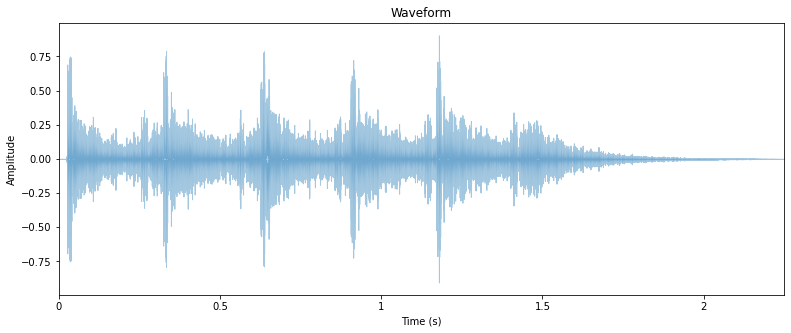

In [12]:
waveform(file)

### 2.1.4. Spectrum

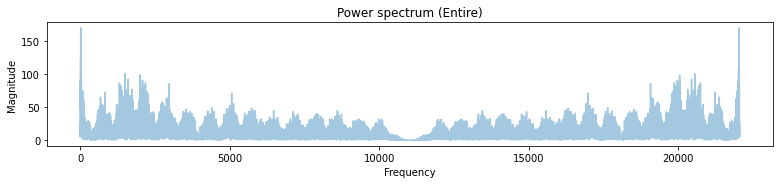

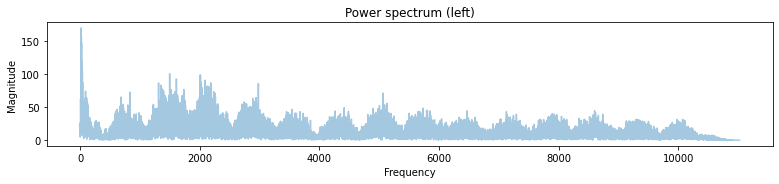

In [13]:
spectrum(file)

### 2.1.5. Spectogram

STFT : Hop Dength Duration = 0.023219954648526078 | Window Duration = 0.09287981859410431


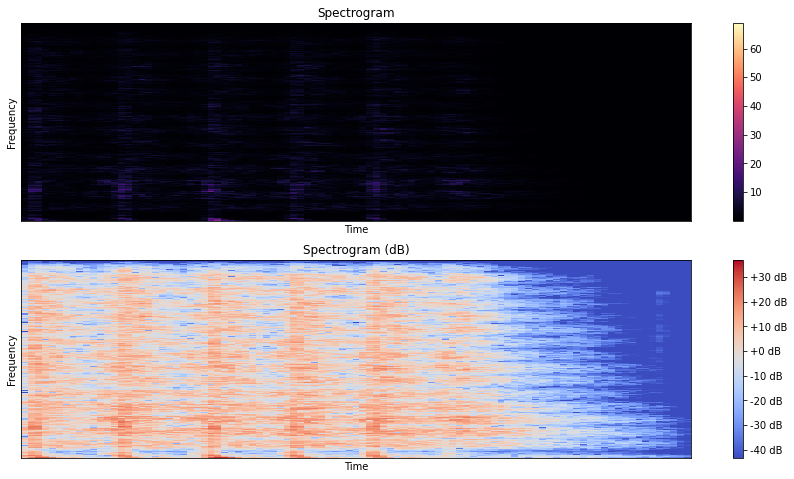

In [14]:
spectogram(file, hop_length=512, n_fft = 2048)

### 2.1.6. MFCCs

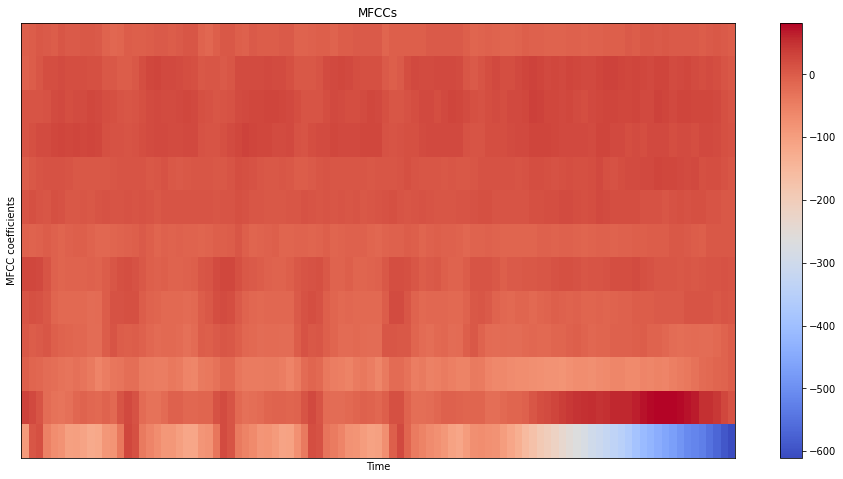

In [15]:
 mfccs(file, hop_length=512, n_fft = 2048,  n_mfcc=13)

> Variables mean value for outcome 0 are less than outcome 1.

# 3. Data Preparation

> extact mfccs

In [17]:
#DATASET_PATH = "../data/sub_raw_data"
JSON_PATH = "prepared_data.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio // sample rate number of sample per second

In [18]:
 preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'data\fold1'
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\101415-3-0-2.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\101415-3-0-3.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\101415-3-0-8.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\102106-3-0-0.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\102305-6-0-0.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\102842-3-0-1.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\102842-3-1-0.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\102842-3-1-5.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\102842-3-1-6.wav: 0
C:/Users/rekidiang/Documents/GitHub/au03_urban_sound_classification/data\fold1\1030

#####################################################################################################

#####################################################################################################

#####################################################################################################

In [ ]:
print("======< FINISH >=======)